<a href="https://www.kaggle.com/code/andrey36912/notebook92795c8130?scriptVersionId=193755886" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/exam-1/data.csv



Умова
Тип задачі

Модель повинна спрогнозувати кількість днів, які пацієнт провів у лікарні. Вам потрібно розв'язати цю задачу як задачу класифікації(спрогнозувати діапазон днів) або задачу регресії(спрогнозувати саму кількість днів), у випадку задачі регресії вам потрібно згенерувати нову цільову ознаку Stay_Days на основі Stay, як середнє значення діапазону.

При тренуванні моделей у вас може бути лише одина ознака Stay_Days чи Stay

Провести попередній аналіз даних

ознайомитись з даними, визначити які ознаки є числовими, а які категоріальні, якщо потрібно то змінити тип стовпчиків
перевірити дані на наявність пропущених значень, зробити висновки які дані залишити, а які видалити
перевірити дані на наявність викидів, при необхідності створити нові дані без викидів
вивести гістограми для числових ознак, кількість стовпчиків має бути рівна квадратному кореню з кількості рядків, дати опис гістограмам:
чи видно викиди
скільки є піків
чи зміщенна гістограма вліво\вправо
вивести ящики з вусами для числових ознак, дати опис ящикам:
в якому діапазоні зосереджено 25%\50%\75%\100% даних
чи є викиди
чи зміщені ящики вліво\вправо
вивести гістограми з кількостями для категоріальних ознак
вивести групові ящики з вусами для числової та категоріальної ознаки, вказати від якої категоріальної ознаки залежить числова ознака і як саме
вивести точкові діаграми для числових ознак, вказати для яких числових ознак є залежність

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('/kaggle/input/exam-1/data.csv')

# Информация о данных
print(df.info())

# Основные статистические показатели
print(df.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         318438 non-null  int64  
 1   case_id                            318438 non-null  int64  
 2   Hospital_code                      318438 non-null  int64  
 3   Hospital_type_code                 318438 non-null  object 
 4   City_Code_Hospital                 318438 non-null  int64  
 5   Hospital_region_code               318438 non-null  object 
 6   Available Extra Rooms in Hospital  318438 non-null  int64  
 7   Department                         318438 non-null  object 
 8   Ward_Type                          318438 non-null  object 
 9   Ward_Facility_Code                 318438 non-null  object 
 10  Bed Grade                          318325 non-null  float64
 11  patientid                          3184

In [3]:
# Проверка типов данных
print(df.dtypes)

# Преобразование типов данных, если необходимо
df['Bed Grade'] = df['Bed Grade'].astype('category')
df['City_Code_Patient'] = df['City_Code_Patient'].astype('category')
df['doctorid'] = df['doctorid'].astype('category')


Unnamed: 0                             int64
case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
doctorid                             float64
country_code                           int64
dtype: object


In [4]:
# Проверка на пропущенные значения
print(df.isnull().sum())

# Заполнение или удаление пропущенных значений
df['Bed Grade'].fillna(df['Bed Grade'].mode()[0], inplace=True)
df['City_Code_Patient'].fillna(df['City_Code_Patient'].mode()[0], inplace=True)
df = df.drop(columns=['doctorid'])  # Удаляем столбец с большим количеством пропущенных данных


Unnamed: 0                                0
case_id                                   0
Hospital_code                             0
Hospital_type_code                        0
City_Code_Hospital                        0
Hospital_region_code                      0
Available Extra Rooms in Hospital         0
Department                                0
Ward_Type                                 0
Ward_Facility_Code                        0
Bed Grade                               113
patientid                                 0
City_Code_Patient                      4532
Type of Admission                         0
Severity of Illness                       0
Visitors with Patient                     0
Age                                       0
Admission_Deposit                         0
Stay                                      0
doctorid                             316012
country_code                              0
dtype: int64


/tmp/ipykernel_36/933911829.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bed Grade'].fillna(df['Bed Grade'].mode()[0], inplace=True)
/tmp/ipykernel_36/933911829.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

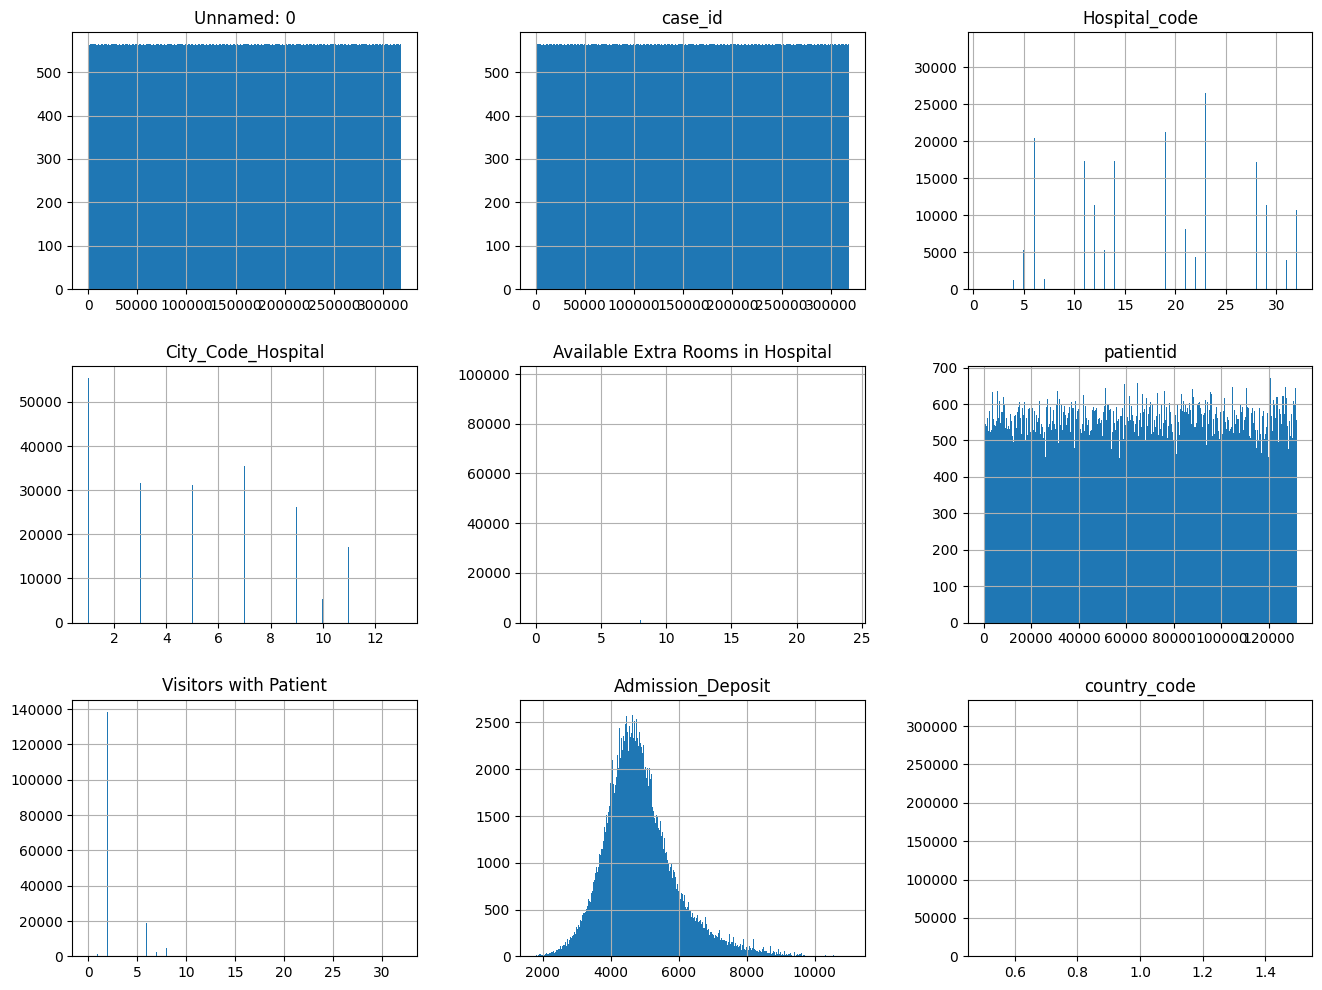

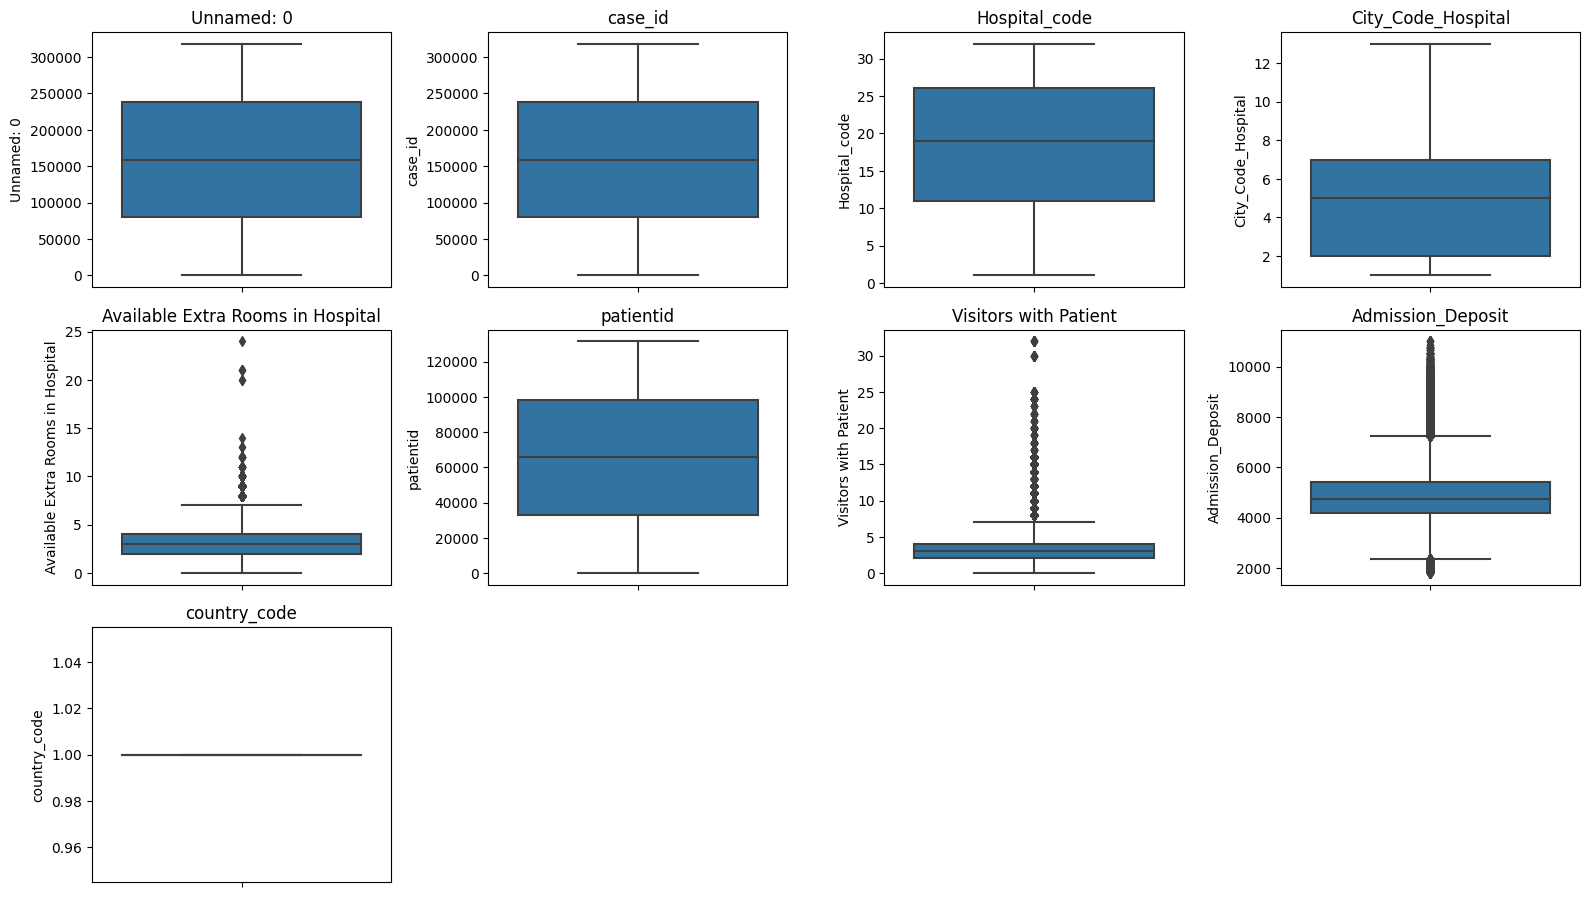

In [5]:
# Выводим гистограммы для числовых признаков
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
n_cols = int(np.ceil(np.sqrt(len(df))))
df[numeric_features].hist(bins=n_cols, figsize=(16, 12))
plt.show()

# Ящики с усами для числовых признаков
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()


In [6]:
# Создание целевой переменной для регрессии
def convert_stay_to_days(stay):
    if stay == '0-10':
        return 5
    elif stay == '11-20':
        return 15
    elif stay == '21-30':
        return 25
    elif stay == '31-40':
        return 35
    elif stay == '41-50':
        return 45
    elif stay == '51-60':
        return 55
    elif stay == '61-70':
        return 65
    elif stay == '71-80':
        return 75
    elif stay == '81-90':
        return 85
    elif stay == '91-100':
        return 95
    elif stay == 'More than 100 Days':
        return 110

df['Stay_Days'] = df['Stay'].apply(convert_stay_to_days)


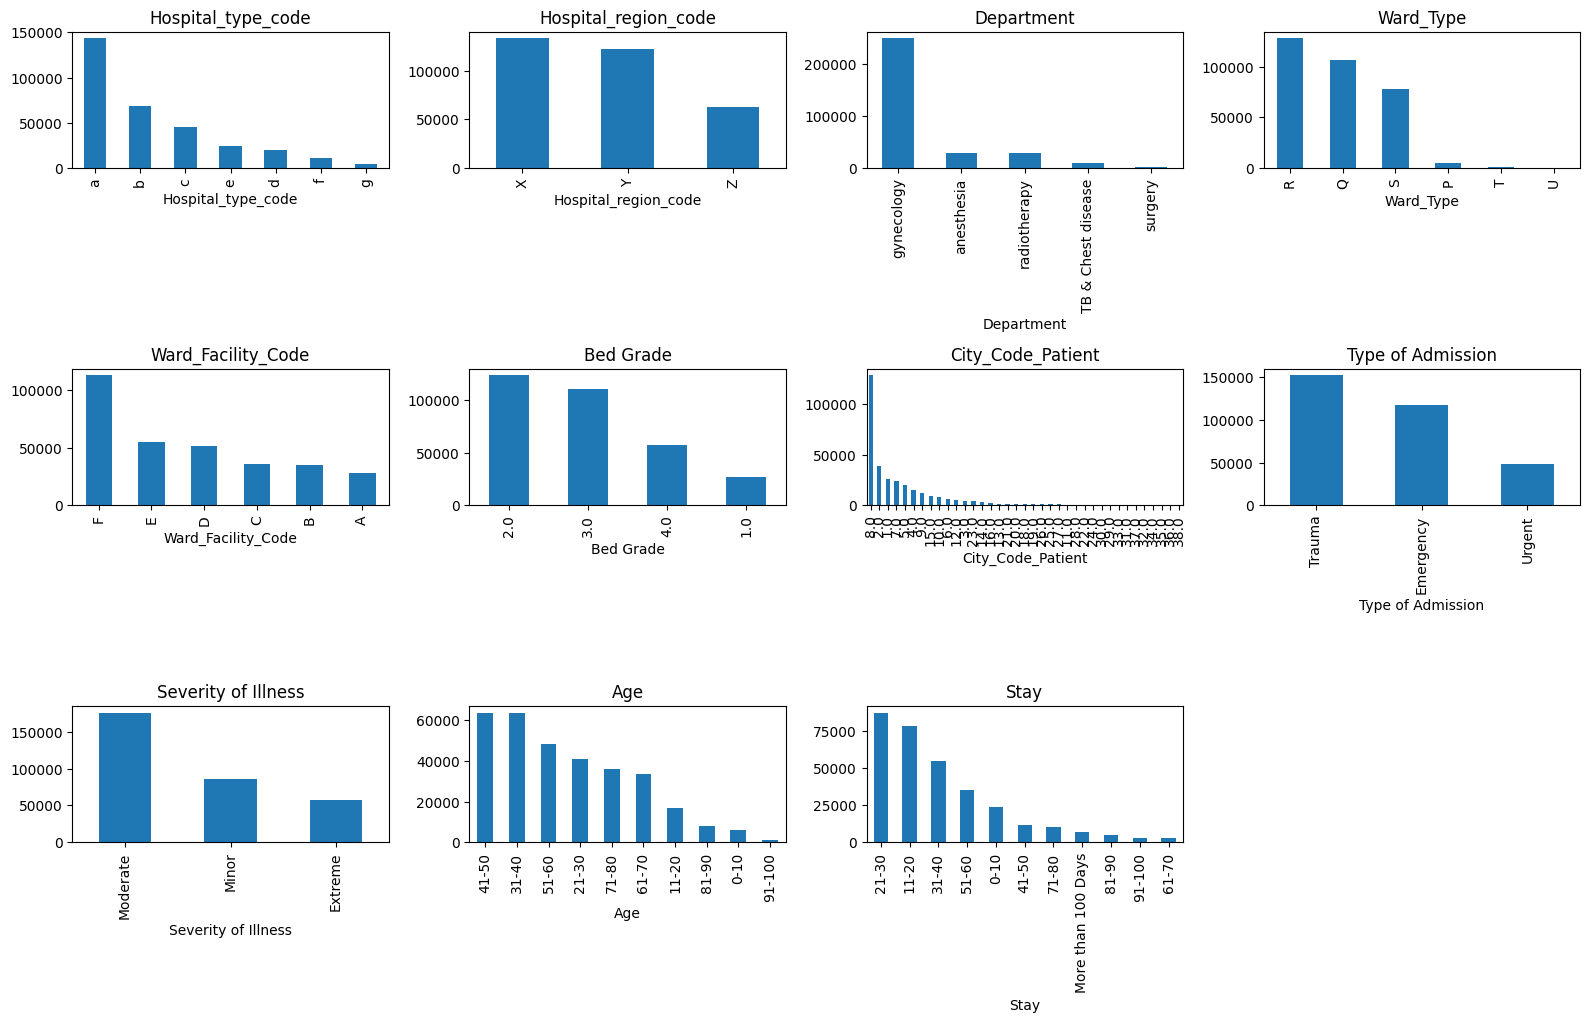

In [7]:
# Гистограммы для категориальных признаков
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

plt.figure(figsize=(16, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 4, i)
    df[feature].value_counts().plot(kind='bar')
    plt.title(feature)
plt.tight_layout()
plt.show()


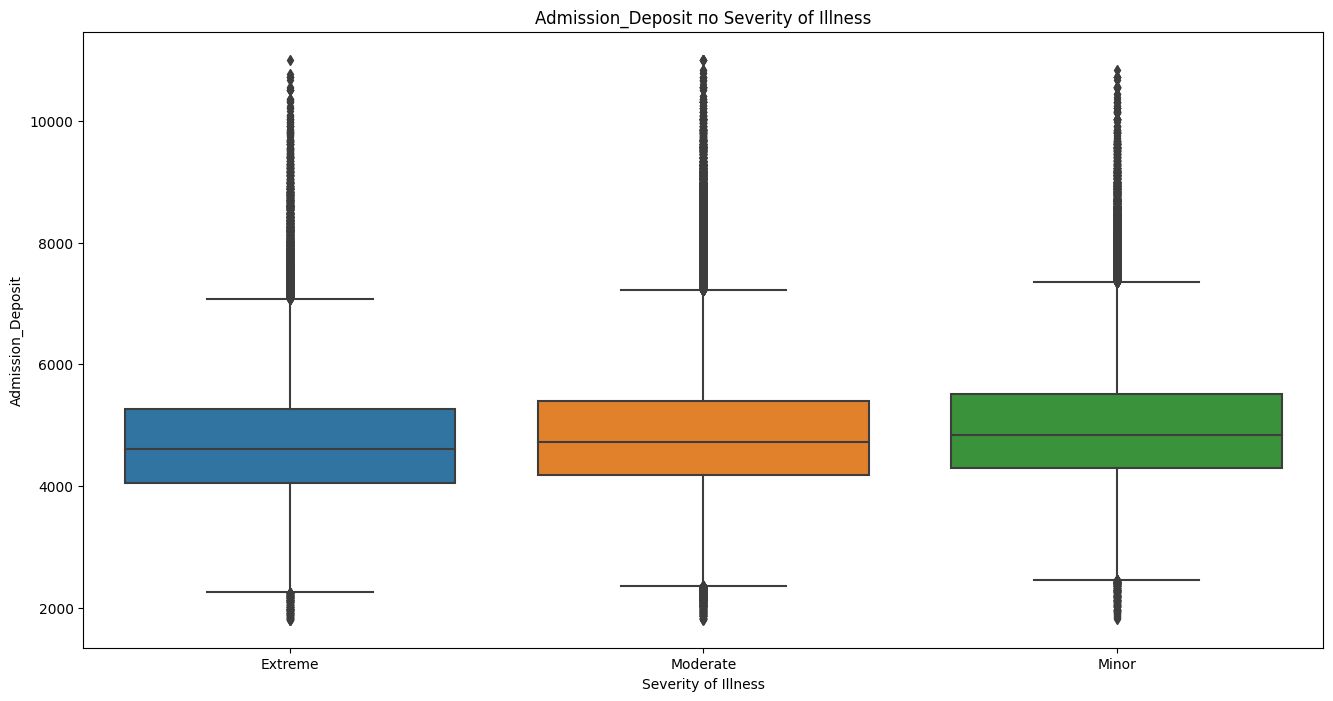

In [8]:
# Групповые ящики с усами
plt.figure(figsize=(16, 8))
sns.boxplot(x='Severity of Illness', y='Admission_Deposit', data=df)
plt.title('Admission_Deposit по Severity of Illness')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

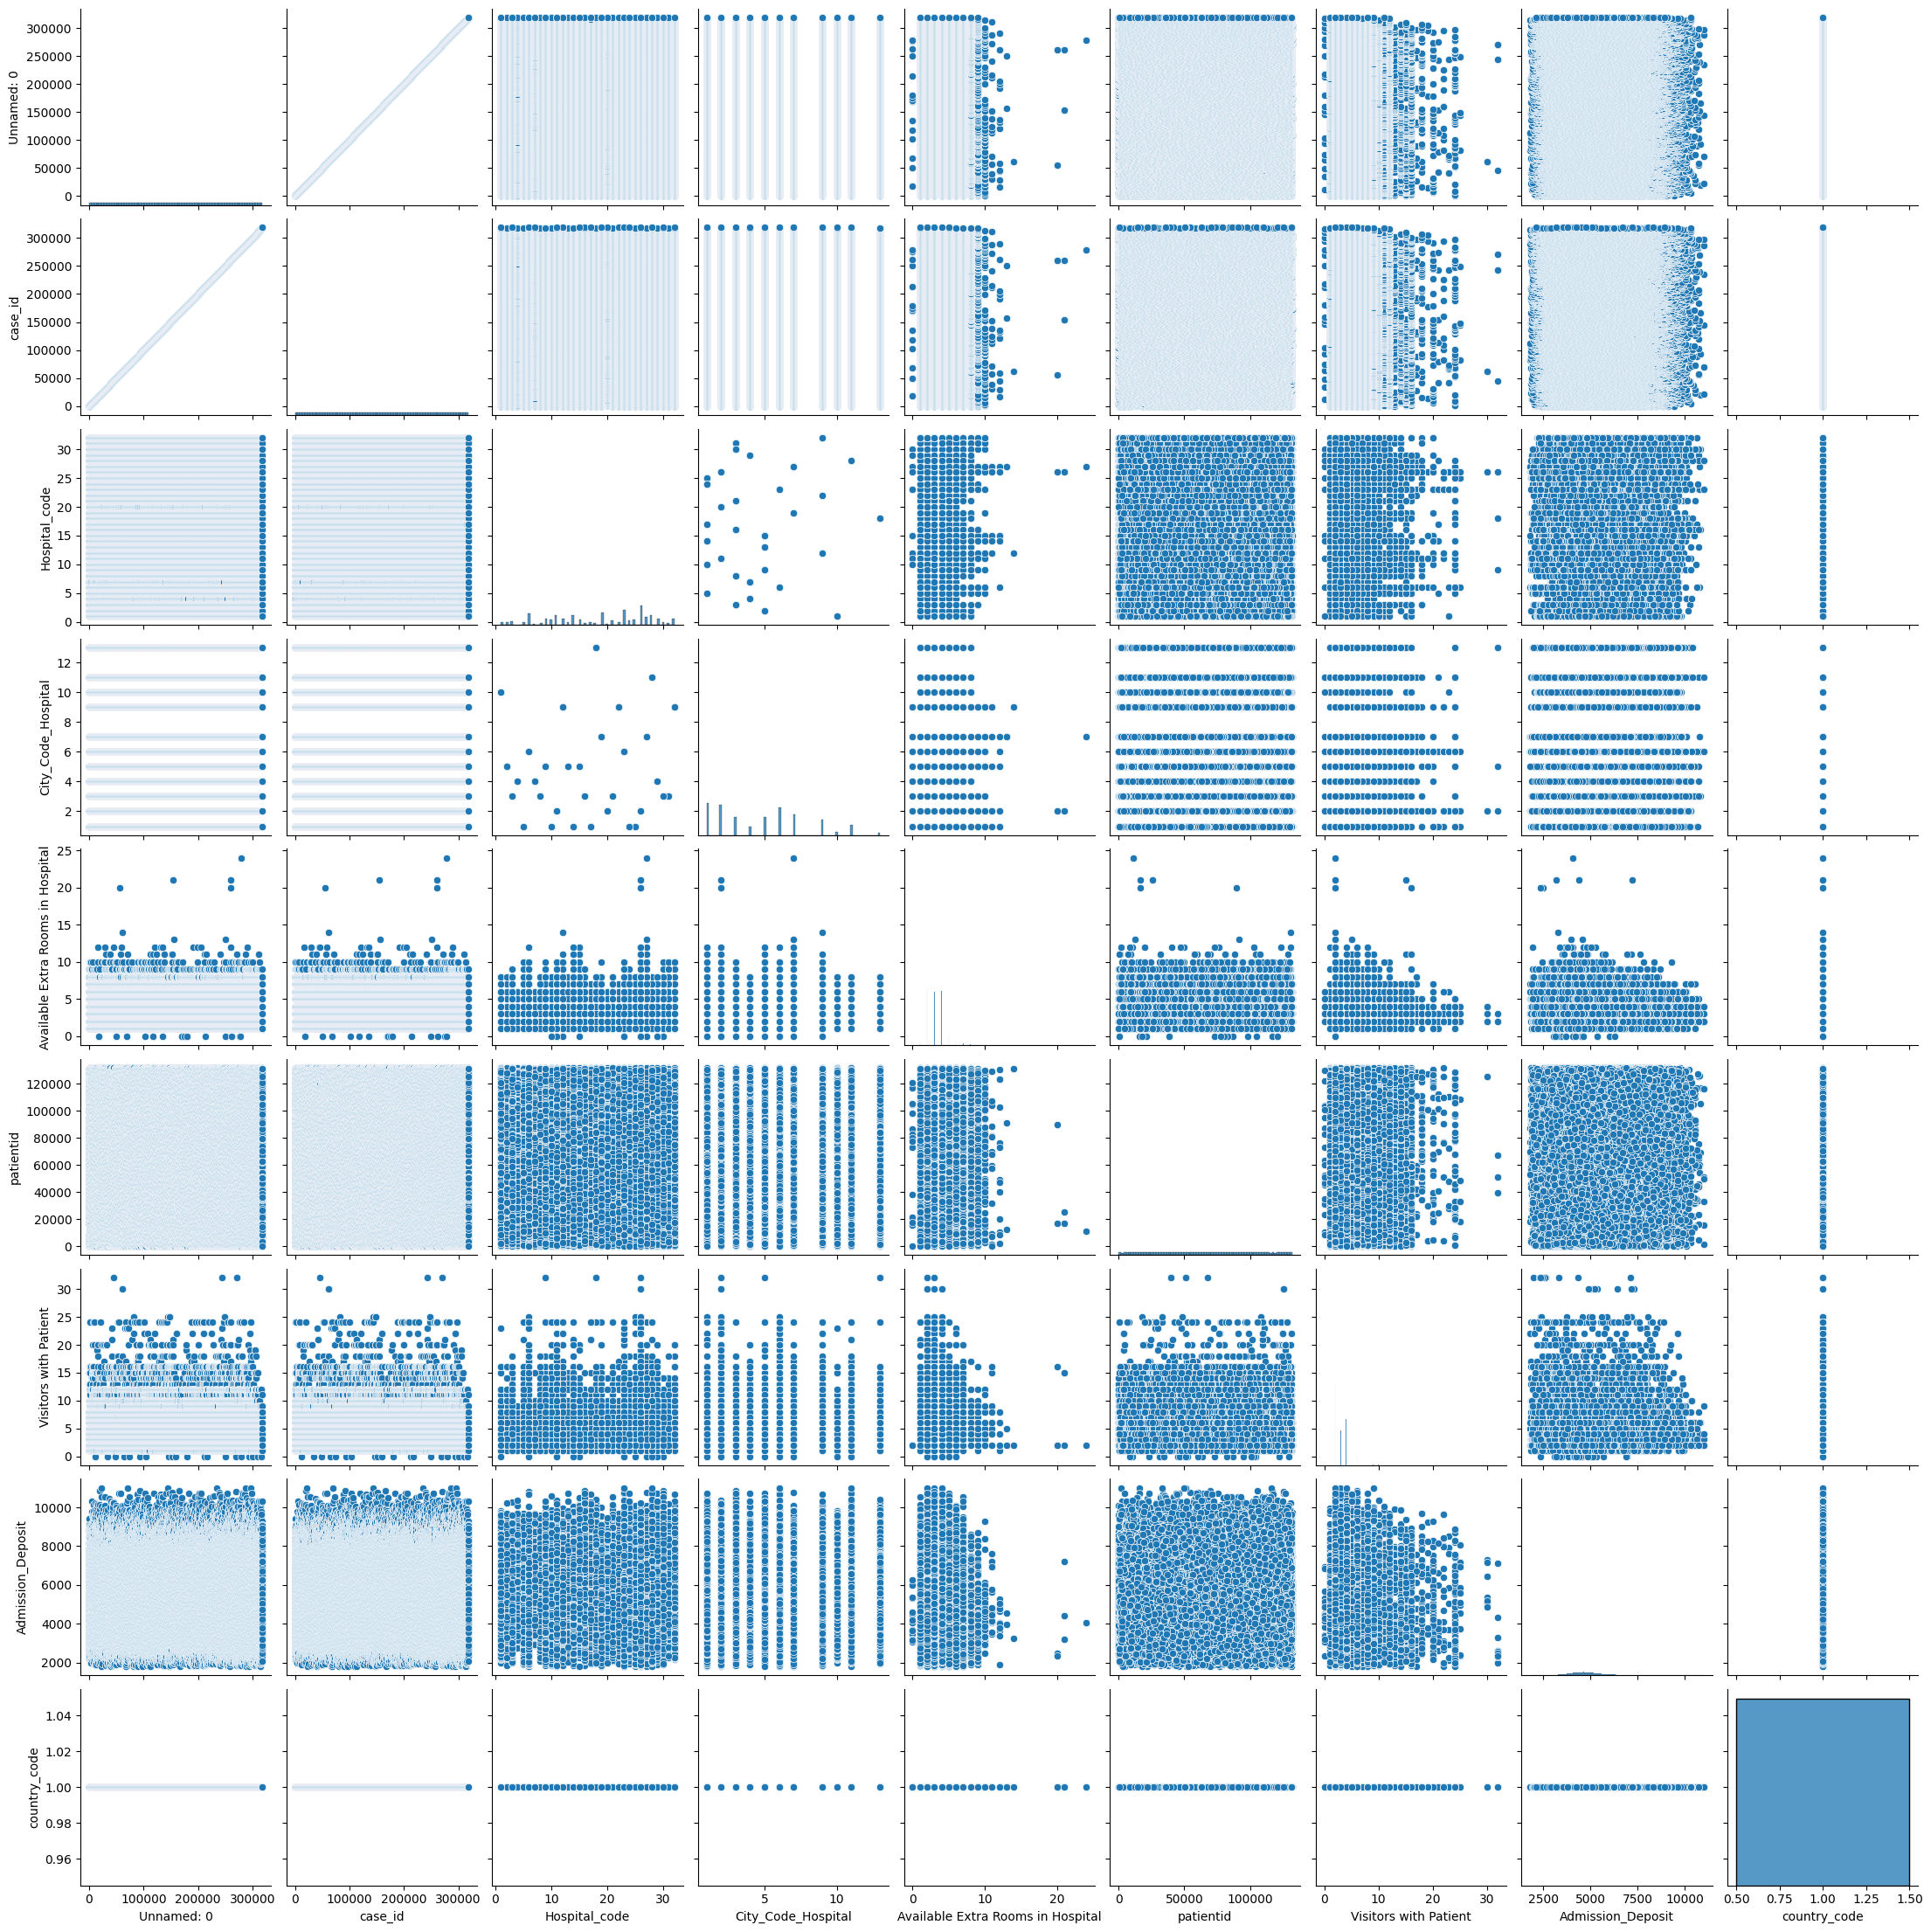

In [9]:
# Точечные диаграммы для числовых признаков
sns.pairplot(df[numeric_features])
plt.show()
